# Sentiment Analysis - Movie Reviews Corpus
## Part 1

Despues: GRid i justificaciones

In [22]:
# Llibreries
# Libraries

import nltk
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import movie_reviews, stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

## Pre-processament / Pre-processing

In [23]:
# Carregar les dades
# Load the data

nltk.download('movie_reviews')
nltk.download('stopwords')

# Carregar el corpus de Movie Reviews
# Load the Movie Reviews corpus
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

# Transformar a DataFrame
# Transform to DataFrame
df = pd.DataFrame(documents, columns=['review', 'sentiment'])

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Claudia\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Claudia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
# Preprocessament del text
# Text preprocessing

# Inicialitzar stopwords i puntuació
# Initialize stopwords and punctuation
stop_words = set(stopwords.words('english'))
translator = str.maketrans('', '', string.punctuation)  #??????

# Funció per preprocessar el text
# Function to preprocess the text
def preprocess_text(text):
    text = " ".join(text).lower()  # Unir palabras y convertir a minúsculas
    text = text.translate(translator)  # Eliminar puntuación
    text = " ".join([word for word in text.split() if word not in stop_words])  # Eliminar stopwords
    return text

# Aplicar preprocesament al text
# Apply text preprocessing
df['review'] = df['review'].apply(preprocess_text)

# Vectorizació amb CountVectorizer
# Vectorization with CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['review']) # Matriz de términos de documentos
y = np.array([1 if sentiment == 'pos' else 0 for sentiment in df['sentiment']])




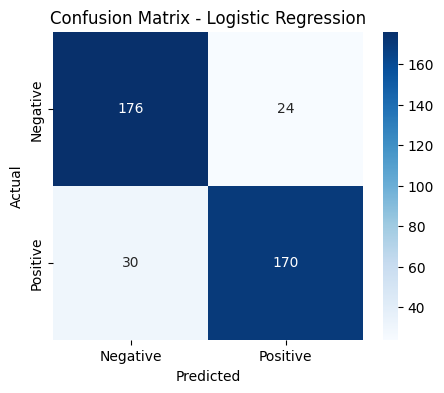

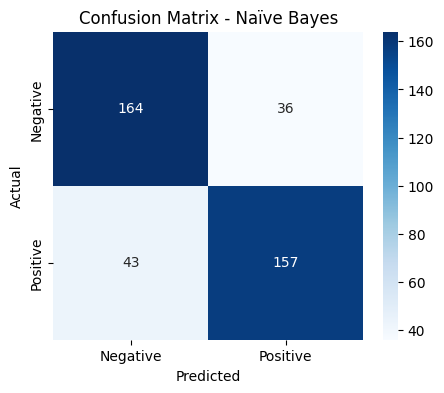

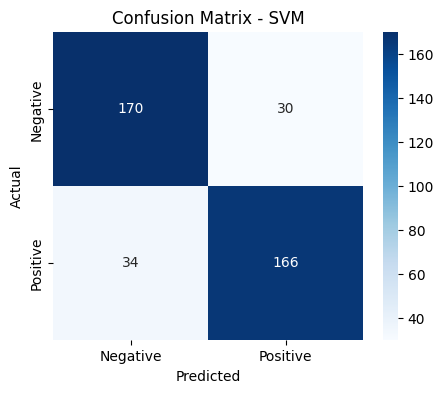

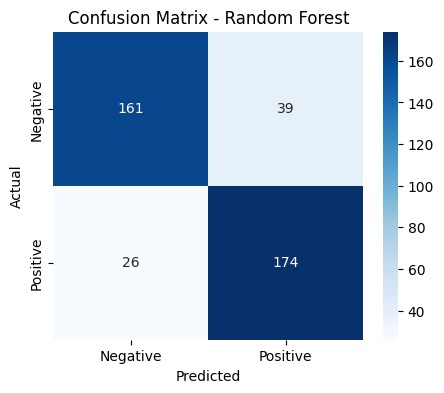

,Model,Best Parameters
0,Logistic Regression,"{'C': 1, 'solver': 'lbfgs'}"
1,Naïve Bayes,{'alpha': 1.0}
2,SVM,"{'C': 0.1, 'kernel': 'linear'}"
3,Random Forest,"{'max_depth': 20, 'n_estimators': 200}"


In [25]:
from sklearn.model_selection import GridSearchCV

# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=150105, stratify=y)

# Modelos supervisados y sus hiperparámetros para GridSearchCV
param_grid = {
    "Logistic Regression": {
        'C': [0.1, 1, 10, 100],
        'solver': ['lbfgs', 'liblinear']
    },
    "Naïve Bayes": {
        'alpha': [0.1, 0.5, 1.0]
    },
    "SVM": {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf']
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30]
    }
    # "Gradient Boosting": {
    #     'n_estimators': [50, 100, 150],
    #     'learning_rate': [0.1, 0.5, 1]
    # }
}

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naïve Bayes": MultinomialNB(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(random_state=42),
    # "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# GridSearchCV y evaluación de modelos
results = {}
best_params = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    best_params[name] = grid_search.best_params_

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

# Comparación de precisiones
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
results_df

# Mejores hiperparámetros
best_params_df = pd.DataFrame(list(best_params.items()), columns=['Model', 'Best Parameters'])
best_params_df

## Part 2:

In [26]:
results_df

,Model,Accuracy
0,Logistic Regression,0.8650
1,Naïve Bayes,0.8025
2,SVM,0.8400
3,Random Forest,0.8375


In [40]:
import nltk
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import movie_reviews
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn

# Assegura't de tenir totes les dades necessàries
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('sentiwordnet')
nltk.download('movie_reviews')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')

nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Claudia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Claudia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\Claudia\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Claudia\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Claudia\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Claudia\AppData\Roaming\nltk_data...
[nltk_data]   Package st

True

In [34]:
# Preprocessament del text
stop_words = set(stopwords.words('english'))

def get_sentiment_score(word, pos):
    """
    Aquesta funció obté el sentiment del synset a partir de SentiWordNet.
    """
    synsets = wn.synsets(word, pos=pos)
    if synsets:
        synset = synsets[0]  # Es fa servir el primer synset que trobem
        senti_score = swn.senti_synset(synset.name())
        return senti_score.pos_score(), senti_score.neg_score()
    return 0, 0  # Si no hi ha synset, retornem 0 com a sentiment neutre

In [35]:

def preprocess_review(text):
    """
    Funció per netejar i preprocessar el text de la ressenya.
    """
    words = word_tokenize(text)
    tagged_words = pos_tag(words)
    
    sentiment_pos, sentiment_neg = 0, 0
    
    # Recorrer les paraules i obtenir el sentiment
    for word, tag in tagged_words:
        # Ignorem paraules comunes (stopwords)
        if word.lower() in stop_words:
            continue
        
        # Convertim el POS de NLTK a un format de WordNet (n = nom, v = verb, a = adjectiu, r = adverbi)
        if tag.startswith('NN'):
            pos = 'n'  # Noun
        elif tag.startswith('VB'):
            pos = 'v'  # Verb
        elif tag.startswith('JJ'):
            pos = 'a'  # Adjective
        elif tag.startswith('RB'):
            pos = 'r'  # Adverb
        else:
            continue  # Ignorem altres tipus de paraules
        
        # Obtenim el sentiment per a la paraula
        pos_score, neg_score = get_sentiment_score(word.lower(), pos)
        sentiment_pos += pos_score
        sentiment_neg += neg_score

    return sentiment_pos, sentiment_neg

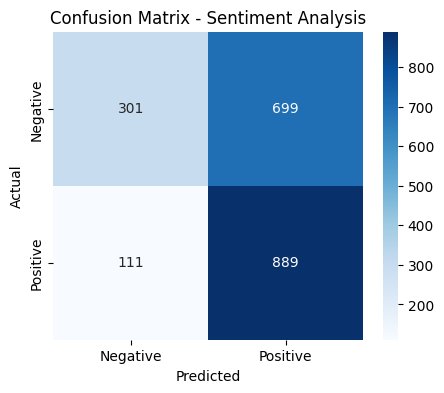

In [43]:
# Test all reviews in the dataset
results = []

for review_index in range(len(df)):
    review_text = df['review'].iloc[review_index]
    pos_score, neg_score = preprocess_review(review_text)
    
    # Combine the values to decide if the review is positive or negative
    sentiment = "Positiu" if pos_score > neg_score else "Negatiu"
    results.append((review_index, sentiment))

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results, columns=['Review Index', 'Sentiment'])

# Crear una matriz de confusión comparando el sentimiento real con el predicho
cm = confusion_matrix(df['sentiment'].apply(lambda x: 1 if x == 'pos' else 0), results_df['Sentiment'].apply(lambda x: 1 if x == 'Positiu' else 0))

# Visualizar la matriz de confusión
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Sentiment Analysis')
plt.show()
